<a href="https://colab.research.google.com/github/MadSlingshoter/Artificial-intelligence-for-data-science-/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##In this lab, we have 5 questions, and each question is worth 0.5 points, for a total of 2.5 points. For each question, you must not only implement the code but also explain your observations

# 📊 Data, EDA, and Preprocessing

---

## 🔹 What is Data?
- **Data** is raw information, such as numbers, text, or images, that we collect for analysis.  
- When processed and organized, data becomes meaningful and can be used to make decisions or train machine learning models.  

---

## 🔹 Structured vs Unstructured Data
- **Structured data** → Data that is neatly organized, like in tables or Excel sheets.  
  *Examples: names, phone numbers, dates.*  
- **Unstructured data** → Data that is not organized in a clear way.  
  *Examples: pictures, videos, emails, text messages.*  

---

## 🔹 Types of Data

| **Type**                   | **Subtype**   | **Meaning**                                     | **Examples** |
|-----------------------------|---------------|-------------------------------------------------|--------------|
| **Numerical (Quantitative)** | **Discrete**  | Whole numbers you can count (no decimals).      | Number of students = 30, Number of cars = 12 |
|                             | **Continuous** | Numbers you can measure (can include decimals). | Height = 175.5 cm, Weight = 68.2 kg, Temperature = 36.7°C |
| **Categorical (Qualitative)** | **Binary**   | Only 2 possible values.                         | Yes/No, Male/Female, On/Off |
|                             | **Ordinal**   | Categories with a natural order/rank.           | Education = High school < Bachelor < Master < PhD |
|                             | **Nominal**   | Categories with no order, just labels.          | Colors = Red, Blue, Green; Countries = Sweden, Iran, Italy |

---

## 🔹 1. Exploratory Data Analysis (EDA)

**What you usually do in EDA:**
- Check the shape of the dataset (rows, columns).  
- Look at missing values.  
- See the basic statistics (mean, median, min, max).  
- Make plots (histograms, boxplots, scatterplots) to understand distributions and relationships.  
- Detect outliers or unusual data points.  

📊 **Example**: If you have a dataset of students’ scores, EDA helps you see:  
- Average score  
- Who scored the highest and lowest  
- Whether boys and girls performed differently  
- If there are missing exam results  

---

## 🔹 2. Preprocessing

 Preprocessing means **cleaning and preparing raw data** so it can be used for analysis or training models.  

**Common Steps in Preprocessing:**
- **Cleaning data**   
  - Handle missing values (fill them, drop them).  
  - Remove duplicates.  
  - Correct wrong or inconsistent values.  

- **Transforming data**
  - Convert text into numbers (e.g., Male = 0, Female = 1).  
  - Normalize/scale numerical values (e.g., make all features between 0 and 1).  

- **Reducing data**  
  - Drop irrelevant columns.  
  - Use feature selection or dimensionality reduction (like PCA).  

- **Splitting data**   
  - Divide into training set and test set.  

 **Example**: If you have house price data:  
- Remove rows where the price is missing.  
- Convert “Yes/No” for garage into 1/0.  
- Scale square meters so they’re comparable to number of rooms.  
- Split into training (80%) and test (20%).  

 In short: Preprocessing = making raw data **clean, consistent, and ready to use**.  



## **🔸 Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import  missingno as msno

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler

## **🔸 Hello Data**

### Load dataset

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/Azadshokrollahi/Artificial-intelligence-for-data-science-/main/insurance.csv"
df = pd.read_csv(url)
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,NaN,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.dtypes

,0
age,float64
sex,object
bmi,float64
children,float64
smoker,object
region,object
charges,float64


### Access to rows and columns

In [5]:
df.iloc[0:3, 2:4]
# df.iloc[[0, 1337]]
# df.iloc[:, [0]]

,bmi,children
0,27.90,0.0
1,33.77,1.0
2,33.00,3.0


In [6]:
# df[['children', 'sex']]
# df.children
# df.sex
df.age

,age
0,19.0
1,NaN
2,28.0
3,33.0
4,32.0
...,...
1333,50.0
1334,18.0
1335,NaN
1336,21.0


### Make a codable dataset

In [7]:
df.columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,NaN,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,NaN,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


# **Question 1: Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) is the process of exploring a dataset to understand its structure, main characteristics, and patterns before applying any machine learning model.  
The goal is to **summarize the data, find relationships, and detect trends or anomalies**.  

In EDA, we often use:  
- **Statistical summaries** → `df.describe()`  
- **Correlation analysis** → `df.corr()`
- **Visualizations** such as:  
  - Histograms → show distributions of individual features  
  - Subplots → compare multiple features at once  
  - Pair plots → show relationships between features  

---

### **Student Task**

1. Perform EDA on the dataset using:  
   - `df.describe()`  
   - `df.corr()`
   - Different diagrams such as **histogram, subplot, and pair plot**  

2. In a **text cell**, write down your **observations**:  
   - What do you notice about the distribution of values?  
   - Which features are correlated (positively or negatively)?  
   - Did you find any unusual patterns or outliers?  


In [8]:
# df.describe()

df2 = df.copy() # copy because I don't want to overwrite the data, but corr() doesn't work otherwise
df2.sex = df2.sex.astype('category').cat.codes
df2.smoker = df2.smoker.astype('category').cat.codes
df2.region = df2.region.astype('category').cat.codes
# these place the integers in the categorical features in alphabetical order
df2.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019283,0.127679,0.053548,-0.023052,-0.000279,0.298536
sex,-0.019283,1.000000,0.042553,0.014973,0.076185,0.004588,0.057292
bmi,0.127679,0.042553,1.000000,0.021078,-0.008052,0.145416,0.172537
children,0.053548,0.014973,0.021078,1.000000,0.007284,-0.002375,0.071236
smoker,-0.023052,0.076185,-0.008052,0.007284,1.000000,-0.002181,0.787251
region,-0.000279,0.004588,0.145416,-0.002375,-0.002181,1.000000,-0.006208
charges,0.298536,0.057292,0.172537,0.071236,0.787251,-0.006208,1.000000


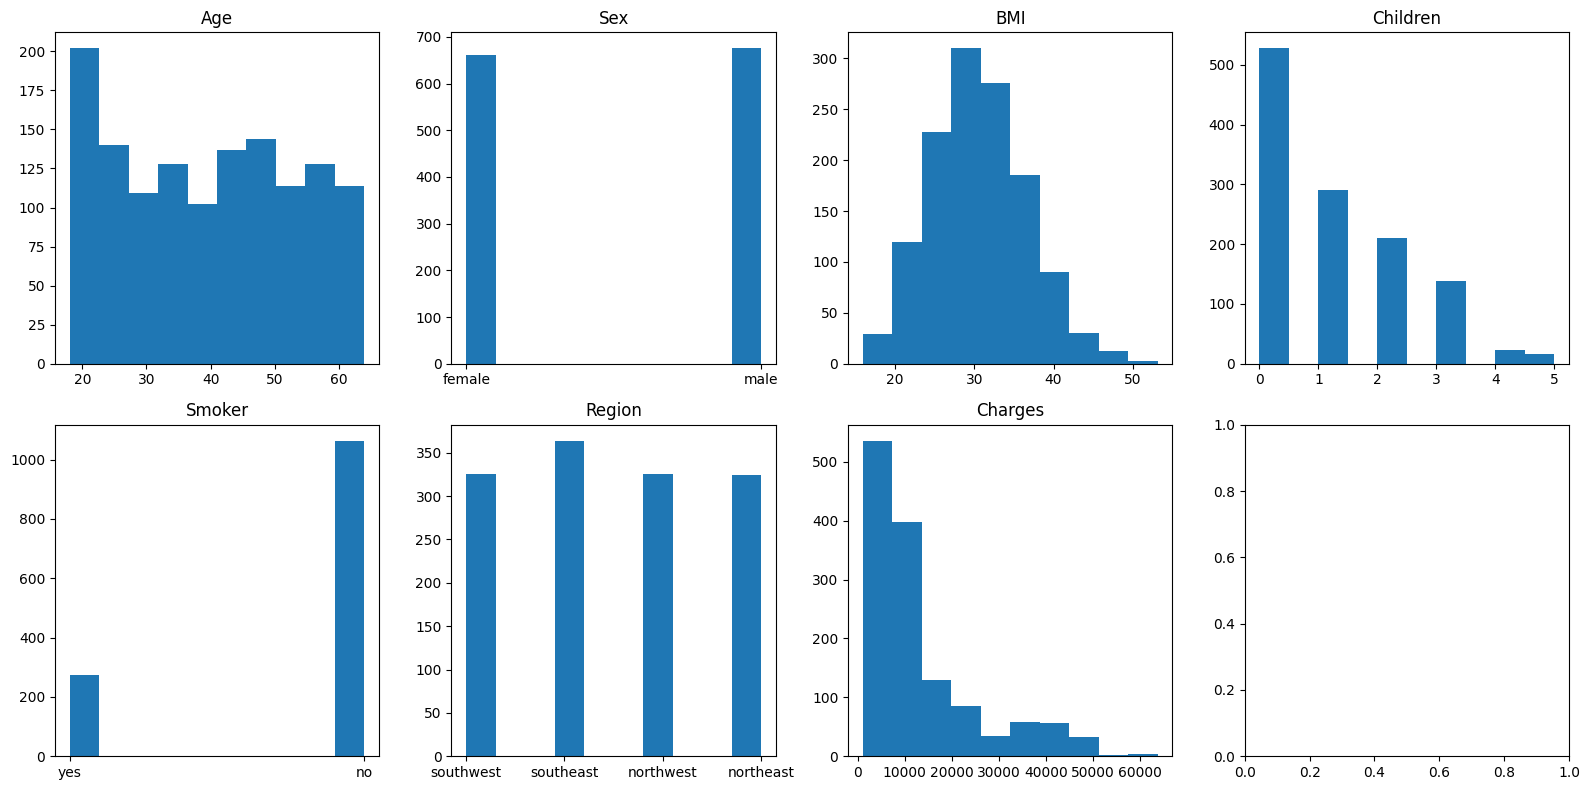

In [9]:
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

axs[0, 0].hist(df.age)
axs[0, 0].set_title('Age')

axs[0, 1].hist(df.sex)
axs[0, 1].set_title('Sex')

axs[0, 2].hist(df.bmi)
axs[0, 2].set_title('BMI')

axs[0, 3].hist(df.children)
axs[0, 3].set_title('Children')

axs[1, 0].hist(df.smoker)
axs[1, 0].set_title('Smoker')

axs[1, 1].hist(df.region)
axs[1, 1].set_title('Region')

axs[1, 2].hist(df.charges)
axs[1, 2].set_title('Charges')

fig.tight_layout()
plt.show()

**Observations**

For the ages, we have a higher number of around 20 years old, but more-or-less even above that. This column has the 3rd most missing values. There is some correlation between ages and BMI as well as charges.

For the sexes, there are almost the same number of male and female. Sex has no significant correlation with other features.

The BMI looks like a right skewed normal distribution. This column has the 2nd most missing values. BMI has some correlation with age, region, and charges.

The children counts look like an inverse proportionality. The children column has the most missing values. Children has no significant correlation with other features.

There are a lot more non-smokers than smokers. The highest correlation is between smokers and charges. Smokers does not have high correlation with any other feature.

There are slightly more people in the southeast region, but the others are mostly even. The region seems to have the least correlation to all the other features, with a slight exception to BMI. There is also a bias introduced in how the regions are made into integers due to there being 4 values instead of 2 as for the other categorical features.

The charges counts look like an inverse proportionality. This feature has the overall most correlation with the other features with age and BMI showing some, and smoker showing high correlation.

### Examining categorical and numerical features

In [10]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1318 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1284 non-null   float64
 3   children  1205 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


,0
age,float64
sex,object
bmi,float64
children,float64
smoker,object
region,object
charges,float64


In [11]:
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

,0
age,float64
sex,category
bmi,float64
children,float64
smoker,category
region,category
charges,float64


# 🔸 Missing Values

In real-world datasets, we often encounter **missing values**.  
This means some entries in the dataset are not recorded or are left blank.  

### 🔹 Why do missing values occur?
- Human error (e.g., survey questions left unanswered).  
- Sensor/device errors (e.g., skipped sensor readings).  
- Privacy reasons (e.g., people not reporting their income).  
- Data corruption or transfer issues.  

Handling missing values correctly is important because they can affect the accuracy of analysis and machine learning models.  

---

## 🔹 Types of Missing Values

| **Type**                                | **Meaning**                                                                      | **Example**                                                                                           | **Difficulty**                                     |
| --------------------------------------- | -------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------- | -------------------------------------------------- |
| **MCAR** (Missing Completely At Random) | Missing values occur randomly, unrelated to any data.                            | A sensor randomly skips a reading.                                                                    |  Easy to handle (no bias).                        |
| **MAR** (Missing At Random)             | Missingness depends on **other observed data**, not on the missing value itself. | Older people are less likely to report income (missingness depends on **age**, which is known).       |  Medium (can use imputation/statistical models). |
| **MNAR** (Missing Not At Random)        | Missingness depends on the **missing value itself**.                             | People with very high income do not report it (missingness depends on **income**, the missing value). |  Hard (needs assumptions or extra data).          |

---




In [12]:
df.info()
df.isna().sum()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1318 non-null   float64 
 1   sex       1338 non-null   category
 2   bmi       1284 non-null   float64 
 3   children  1205 non-null   float64 
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(4)
memory usage: 46.3 KB


,0
age,20
sex,0
bmi,54
children,133
smoker,0
region,0
charges,0


<Axes: >

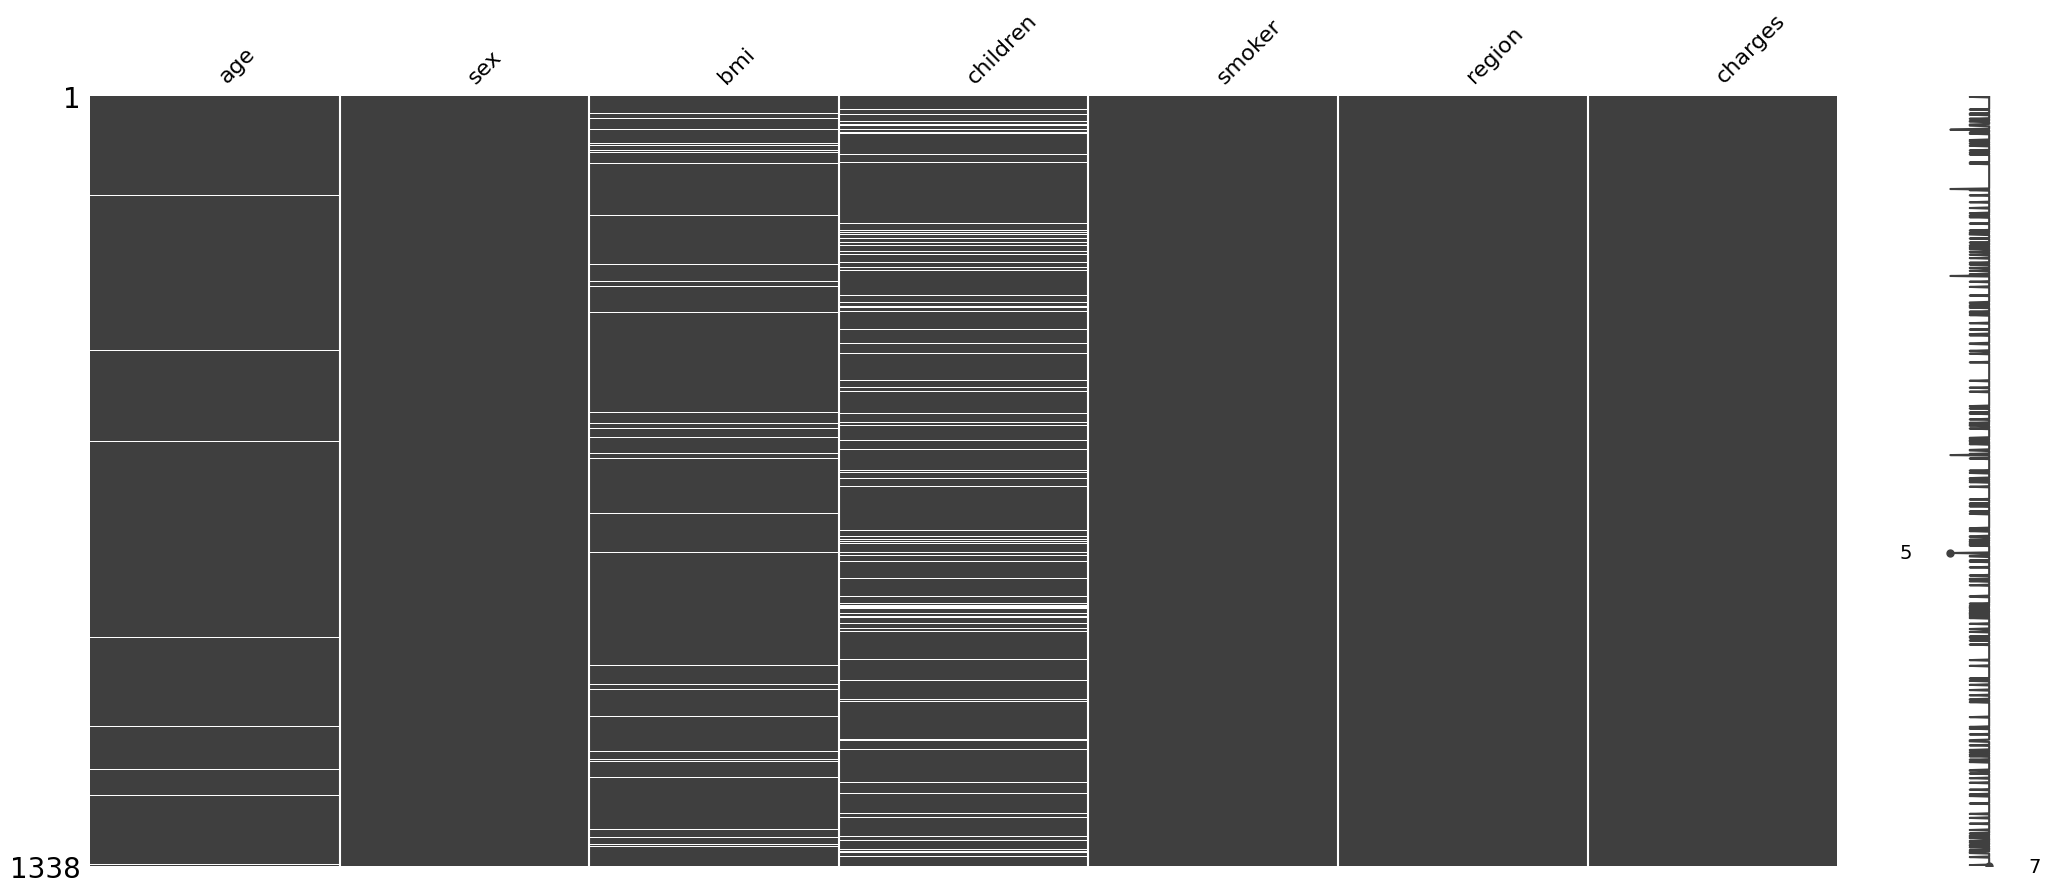

In [13]:
msno.matrix(df)

### Diagnose missing values

#  Question 2: Diagnosing Missing Values with Histograms

In this exercise, you will investigate **missing values** in a dataset and decide whether they are **MCAR, MAR, or MNAR**.  

We will use **histograms** to compare distributions of features with and without missing values.  

---

### **Your Coding Task**

Write a Python function called `diagnose_mv(df, mv_column)` that:

1. **Inputs**:
   - `df`: a pandas DataFrame  
   - `mv_column`: the column that has missing values  

2. **For each feature (column) in the dataset**:
   - Plot a **histogram** of the feature using **all rows** (this includes rows where `mv_column` is missing).  
   - Plot another **histogram** of the same feature, but only using rows where `mv_column` is **not missing**.  
   - Plot a **bar chart** showing the **absolute difference** between the two histograms (bin by bin).  

3. **Arrange the plots**:
   - Left → histogram with all rows  
   - Middle → histogram without rows where `mv_column` is missing  
   - Right → bar chart showing the difference  

---

### **Interpretation Task**

After you run your function and generate the histograms:

- Compare the shapes of the histograms.  
- Decide whether the missingness in your dataset looks like **MCAR, MAR, or MNAR**.  
- Write your conclusion in a **text cell** (5–10 sentences) explaining what you observed.  


##### ** Function

In [14]:

def diagnose_mv(df, mv_column):
  df2 = df.dropna(subset=mv_column)

  # Convert category features to int for counting.
  df_code = df.copy()
  df2_code = df2.copy()
  df_code.sex = df_code.sex.cat.codes
  df_code.smoker = df_code.smoker.cat.codes
  df_code.region = df_code.region.cat.codes
  df2_code.sex = df2_code.sex.cat.codes
  df2_code.smoker = df2_code.smoker.cat.codes
  df2_code.region = df2_code.region.cat.codes
  # note that these places the integer respective to the alphabetical order, which the histograms do not

  fig, axs = plt.subplots(7, 3, figsize=(12, 20))

  # Age

  axs[0, 0].hist(df.age)
  axs[0, 0].set_title('Age with MV')

  axs[0, 1].hist(df2.age)
  axs[0, 1].set_title('Age without MV')

  binwidth = (max(df.age) - min(df.age)) / 10
  bin_edges = np.arange(min(df.age), max(df.age)+binwidth, binwidth)
  a_hist, _ = np.histogram(df.age, bins=bin_edges)
  b_hist, _ = np.histogram(df2.age, bins=bin_edges)
  h_diff = abs(a_hist - b_hist)

  axs[0, 2].stairs(h_diff, bin_edges, fill=True)
  axs[0, 2].set_title('Difference')

  # Sex

  axs[1, 0].hist(df.sex)
  axs[1, 0].set_title('Sex with MV')

  axs[1, 1].hist(df2.sex)
  axs[1, 1].set_title('Sex without MV')

  binwidth = (max(df_code.sex) - min(df_code.sex)) / 10
  bin_edges = np.arange(min(df_code.sex), max(df_code.sex)+binwidth, binwidth)
  a_hist, _ = np.histogram(df_code.sex, bins=bin_edges)
  b_hist, _ = np.histogram(df2_code.sex, bins=bin_edges)
  h_diff = abs(a_hist - b_hist)

  axs[1, 2].stairs(h_diff, bin_edges, fill=True)
  axs[1, 2].set_title('Difference')

  # BMI

  axs[2, 0].hist(df.bmi)
  axs[2, 0].set_title('BMI with MV')

  axs[2, 1].hist(df2.bmi)
  axs[2, 1].set_title('BMI without MV')

  binwidth = (max(df.bmi) - min(df.bmi)) / 10
  bin_edges = np.arange(min(df.bmi), max(df.bmi)+binwidth, binwidth)
  a_hist, _ = np.histogram(df.bmi, bins=bin_edges)
  b_hist, _ = np.histogram(df2.bmi, bins=bin_edges)
  h_diff = abs(a_hist - b_hist)

  axs[2, 2].stairs(h_diff, bin_edges, fill=True)
  axs[2, 2].set_title('Difference')

  # Children

  axs[3, 0].hist(df.children)
  axs[3, 0].set_title('Children with MV')

  axs[3, 1].hist(df2.children)
  axs[3, 1].set_title('Children without MV')

  binwidth = (max(df.children) - min(df.children)) / 10
  bin_edges = np.arange(min(df.children), max(df.children)+binwidth, binwidth)
  a_hist, _ = np.histogram(df.children, bins=bin_edges)
  b_hist, _ = np.histogram(df2.children, bins=bin_edges)
  h_diff = abs(a_hist - b_hist)

  axs[3, 2].stairs(h_diff, bin_edges, fill=True)
  axs[3, 2].set_title('Difference')

  # Smoker

  axs[4, 0].hist(df.smoker)
  axs[4, 0].set_title('Smoker with MV')

  axs[4, 1].hist(df2.smoker)
  axs[4, 1].set_title('Smoker without MV')

  binwidth = (max(df_code.smoker) - min(df_code.smoker)) / 10
  bin_edges = np.arange(min(df_code.smoker), max(df_code.smoker)+binwidth, binwidth)
  a_hist, _ = np.histogram(df_code.smoker, bins=bin_edges)
  b_hist, _ = np.histogram(df2_code.smoker, bins=bin_edges)
  h_diff = abs(a_hist - b_hist)

  axs[4, 2].stairs(h_diff, bin_edges, fill=True)
  axs[4, 2].set_title('Difference')

  # Region

  axs[5, 0].hist(df.region)
  axs[5, 0].set_title('Region with MV')

  axs[5, 1].hist(df2.region)
  axs[5, 1].set_title('Region without MV')

  binwidth = (max(df_code.region) - min(df_code.region)) / 10
  bin_edges = np.arange(min(df_code.region), max(df_code.region)+binwidth, binwidth)
  a_hist, _ = np.histogram(df_code.region, bins=bin_edges)
  b_hist, _ = np.histogram(df2_code.region, bins=bin_edges)
  h_diff = abs(a_hist - b_hist)

  axs[5, 2].stairs(h_diff, bin_edges, fill=True)
  axs[5, 2].set_title('Difference')

  # Charges

  axs[6, 0].hist(df.charges)
  axs[6, 0].set_title('Charges with MV')

  axs[6, 1].hist(df2.charges)
  axs[6, 1].set_title('Charges without MV')

  binwidth = (max(df.charges) - min(df.charges)) / 10
  bin_edges = np.arange(min(df.charges), max(df.charges)+binwidth, binwidth)
  a_hist, _ = np.histogram(df.charges, bins=bin_edges)
  b_hist, _ = np.histogram(df2.charges, bins=bin_edges)
  h_diff = abs(a_hist - b_hist)

  axs[6, 2].stairs(h_diff, bin_edges, fill=True)
  axs[6, 2].set_title('Difference')

  fig.tight_layout()
  plt.show()





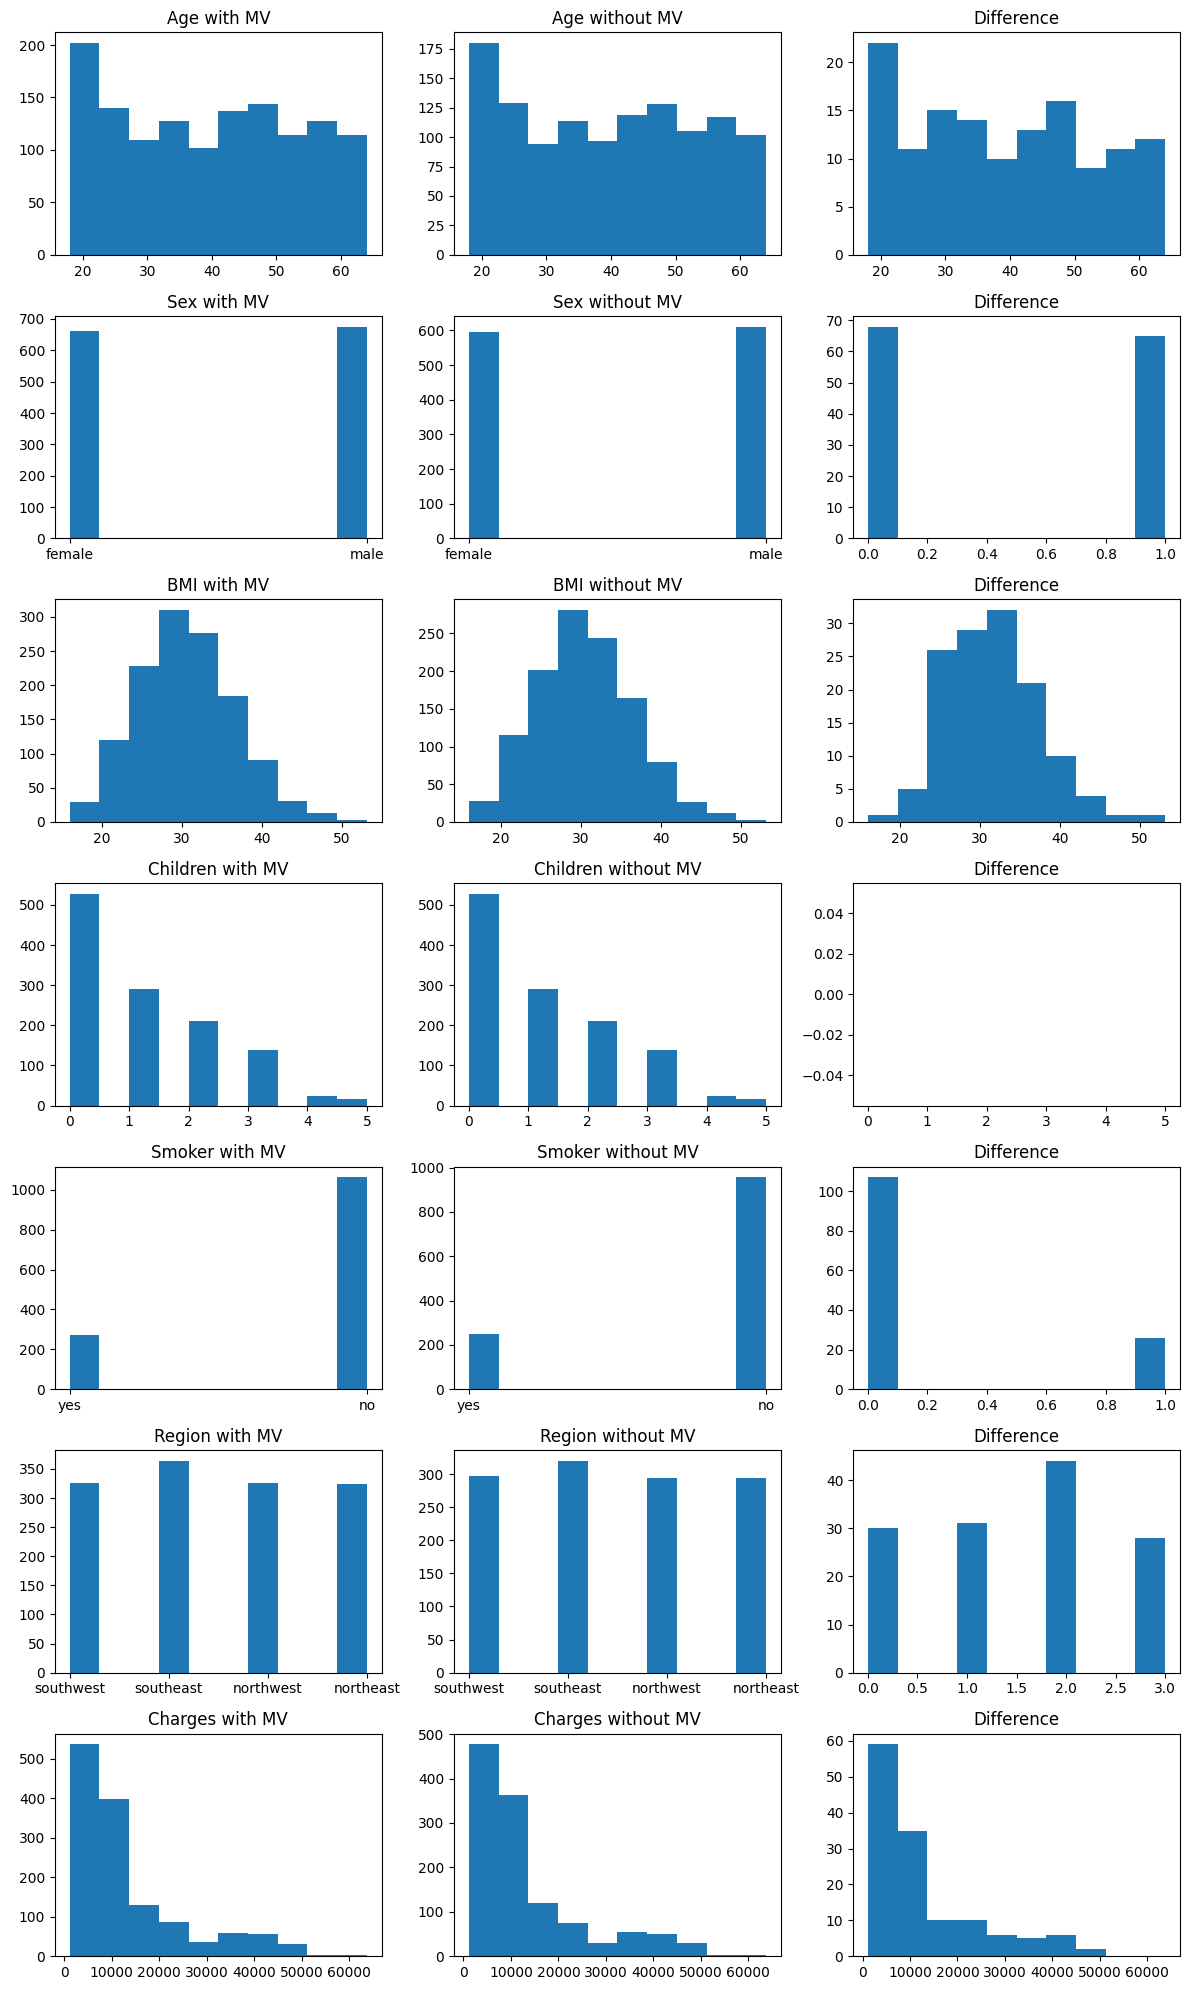

In [15]:
diagnose_mv(df, 'children')

#### * BMI

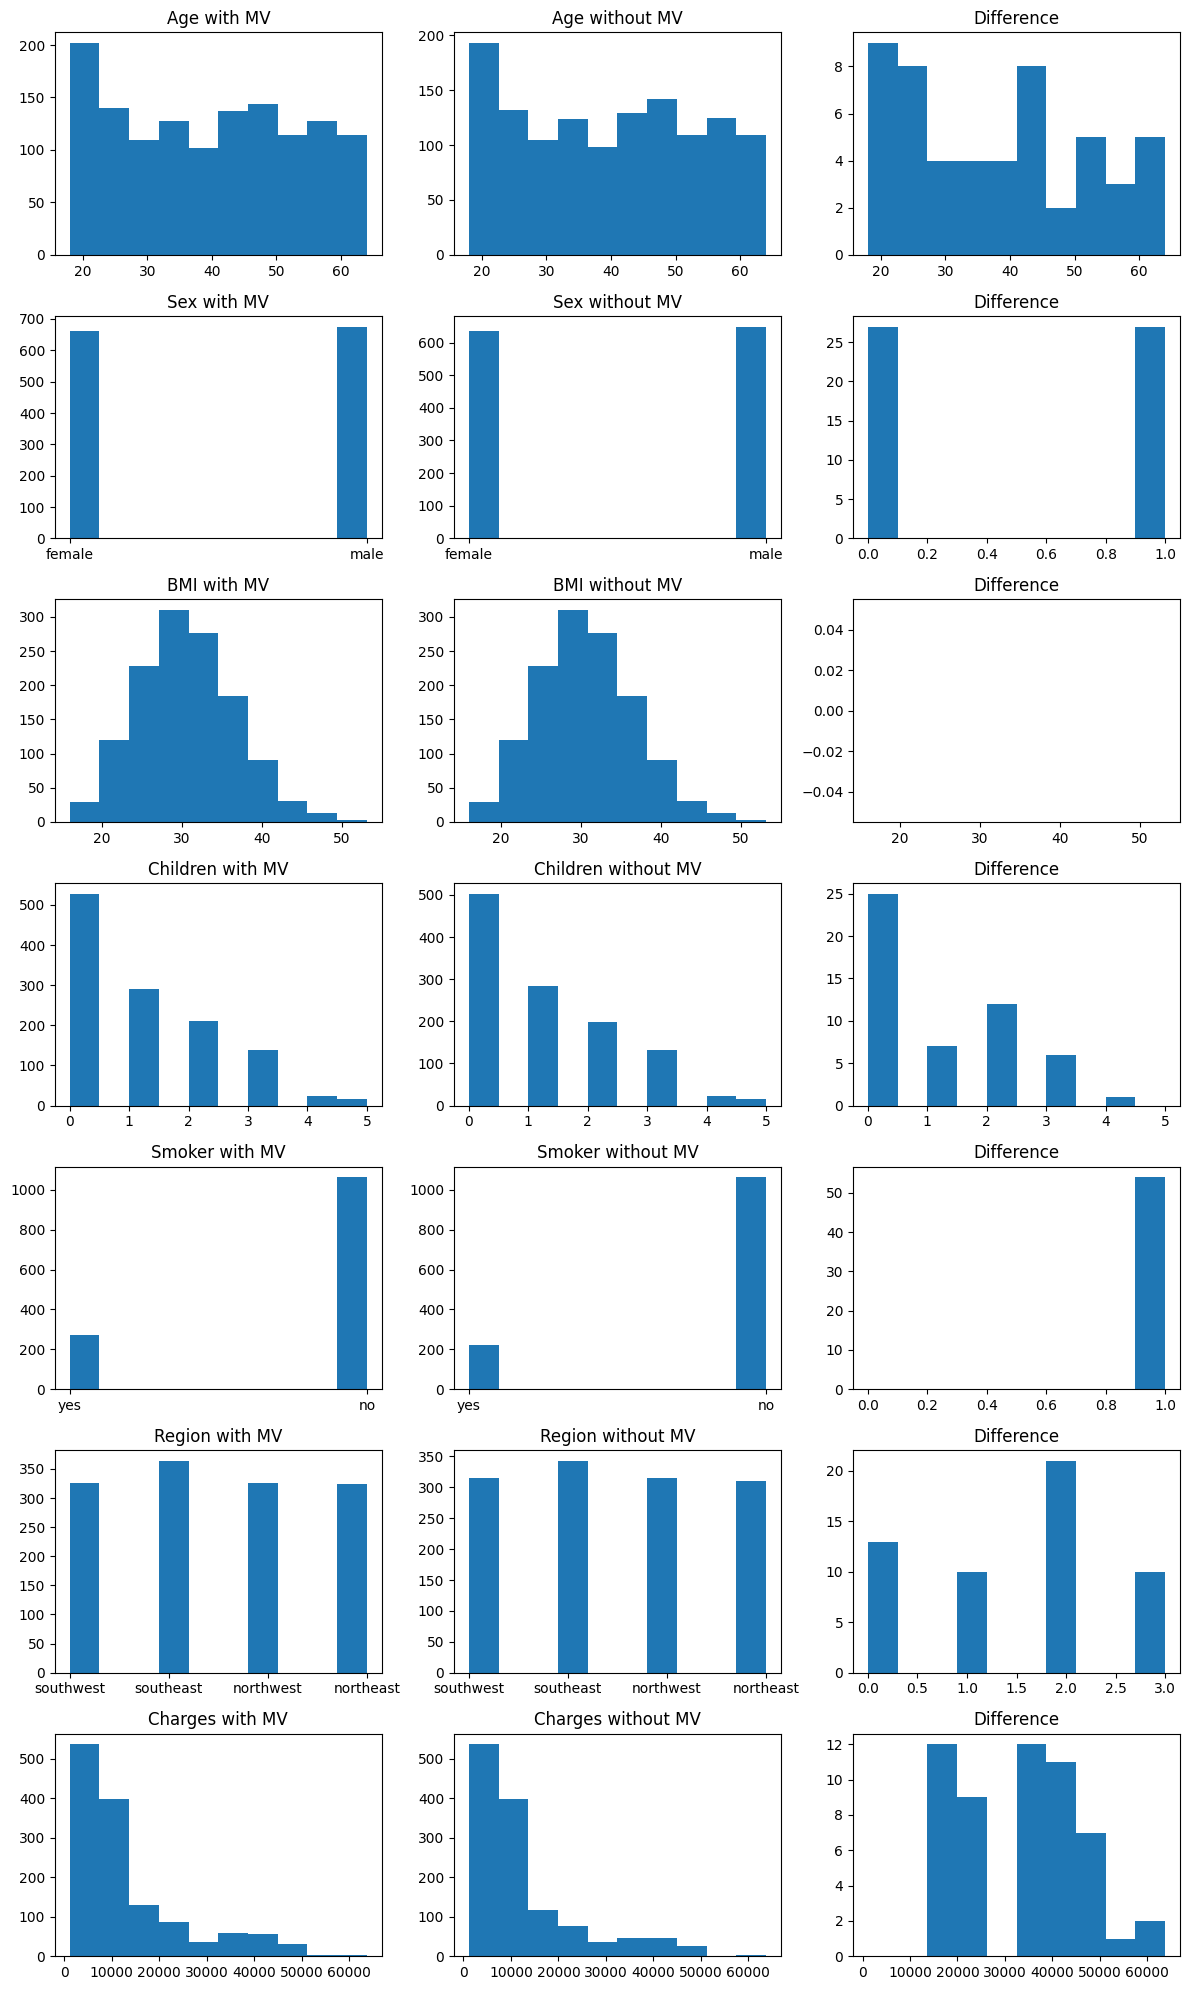

In [16]:
diagnose_mv(df, 'bmi')

#### * Age

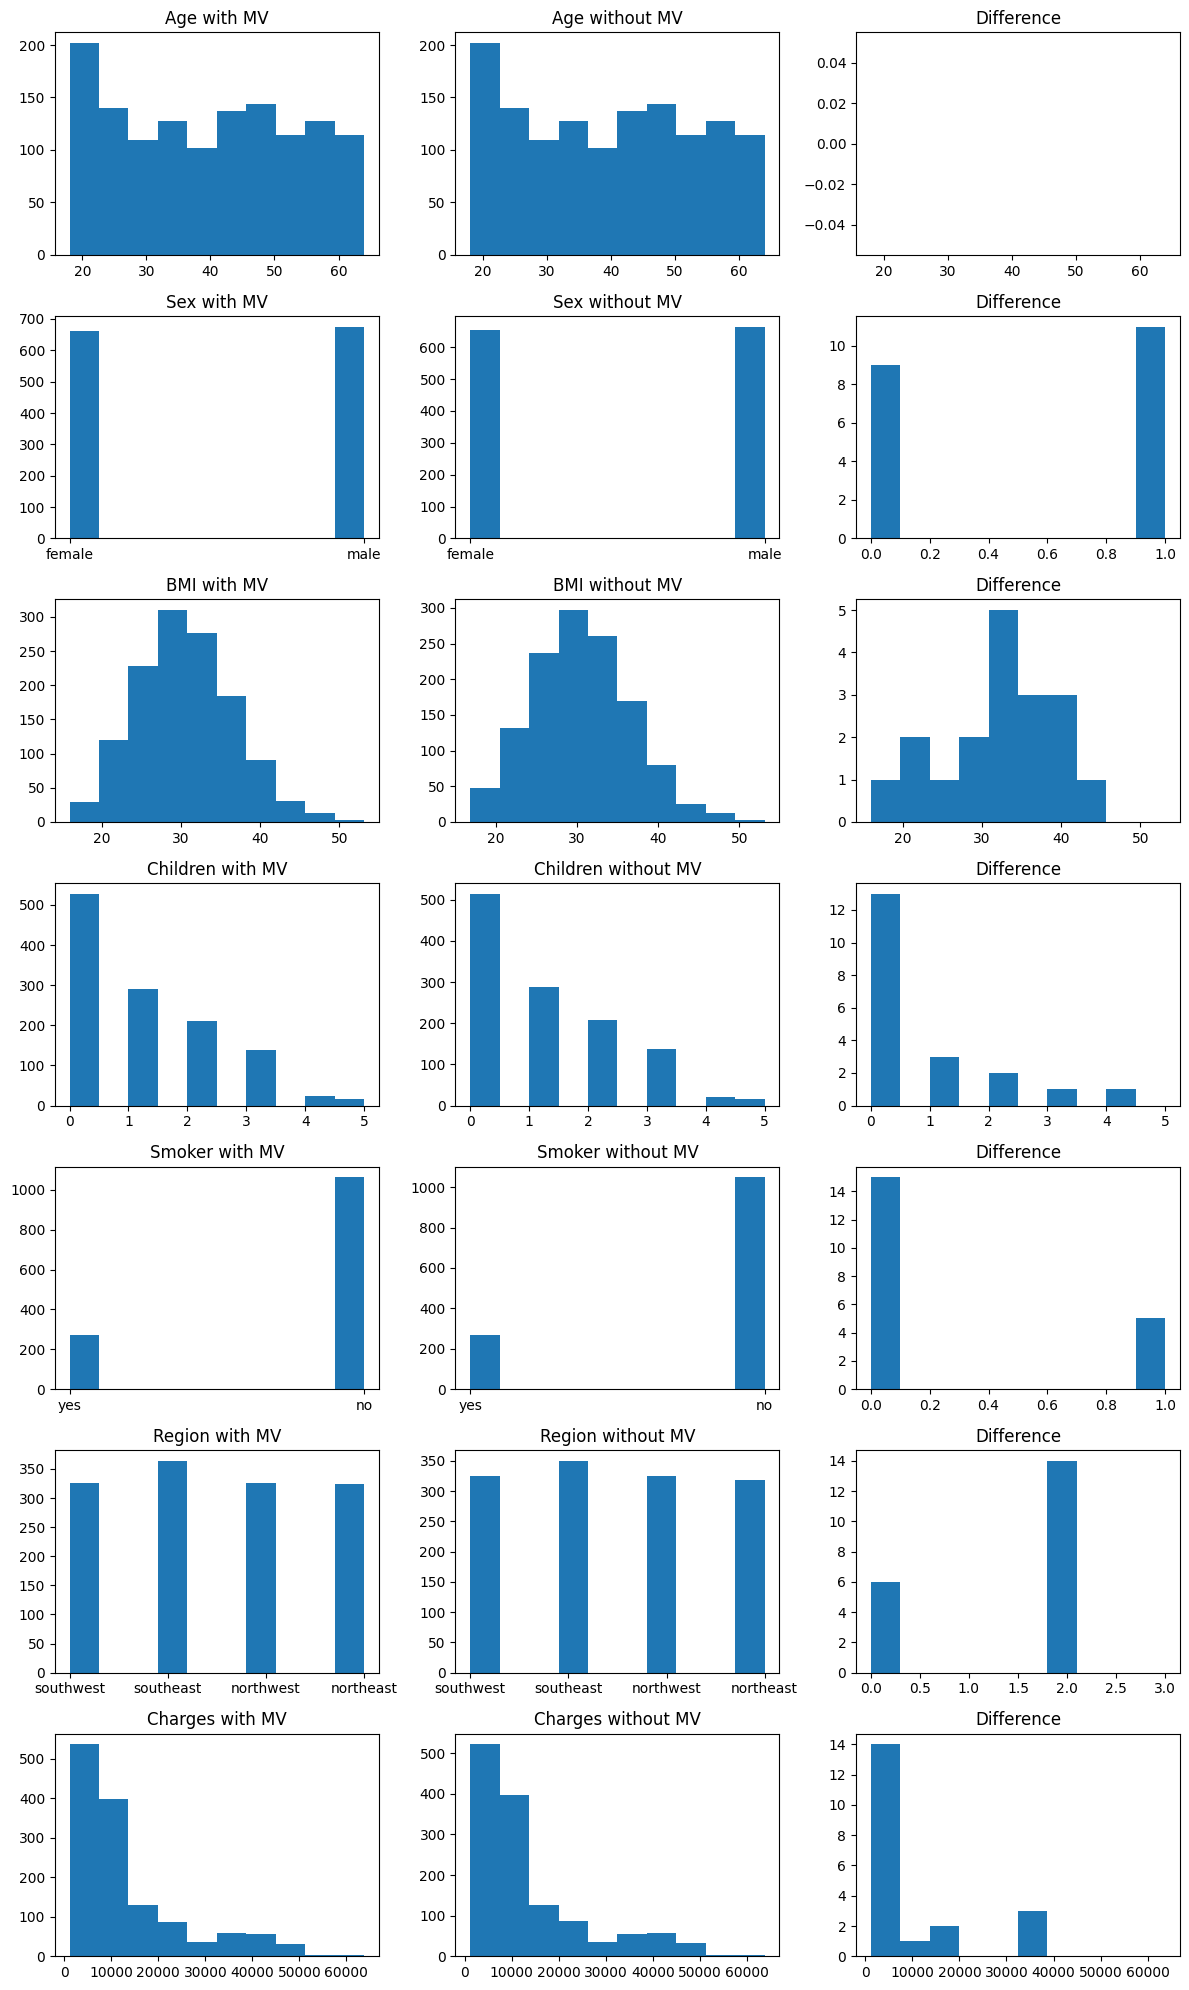

In [17]:
diagnose_mv(df, 'age')

**Observation 2**

Removing the missing children values seems to keep the differences in the same general shape for all features, which indicate MCAR.

Removing the missing BMI values seems to give a difference that does not seem to follow the same pattern, which indicate MNAR.

Removing the missing age values seem to give something inbetween the other two. The overall same pattern is there for the most part, but not completely, which indicate MAR.

The difference graphs also follow the correlation calculation done in question 1.

# 🔸 Handling Missing Values

Once we identify the type of missing data, we need to choose the right strategy to handle it.  
Different approaches are suitable for **MCAR, MAR, and MNAR**.  

---

## Handling Strategies

| **Type** | **Best Handling Methods** | **Notes** |
|----------|---------------------------|-----------|
| **MCAR** (Missing Completely At Random) | - Drop rows with missing values (safe, no bias) <br> - Drop entire column (if too many missing values) <br> - Simple imputation (mean, median, mode) | Since missingness is random, any method works without bias. |
| **MAR** (Missing At Random) | - Use **imputation based on other features** (regression imputation, KNN imputer, multiple imputation) <br> - Group-wise imputation (e.g., fill income by median per age group) | Missingness is linked to other variables, so we must use them to estimate. |
| **MNAR** (Missing Not At Random) | - Add a “missing” indicator/flag column <br> - Use **domain knowledge** or expert rules to fill values <br> - Sensitivity analysis <br> - Sometimes drop rows (but may bias results) | Hardest to handle because the missingness depends on the missing value itself. Often needs external info or careful modeling. |

---

 **Summary:**  
- **MCAR** → easiest, can drop or use simple fill (mean/median/mode).  
- **MAR** → medium, use relationships with other features to impute.  
- **MNAR** → hardest, may need domain knowledge, missing flags, or more data.  


## Question 3: Handling Different Types of Missing Values

Now that you know how to identify MCAR, MAR, and MNAR, let’s practice handling them in a dataset.  

### **Your Task**

For each of the following cases, apply the correct method to handle missing values:  

1. **MCAR**  
   - Missing values are random.  
   - Replace missing values with the **mode** (most frequent value).  

2. **MAR**  
   - Missing values depend on another variable.  
   - Use **conditional imputation**, such as replacing missing values with the **median** (or mean) within subgroups.  

3. **MNAR**  
   - Missing values depend on the value itself.  
   - Handle them by **dropping rows** with missing values, or by creating a **“missing” indicator column**.  

---

After handling the missing values:  
- Use `msno.matrix(df)` (or another visualization) to verify that there are no missing values left.  
- In a **text cell**, explain in 2–3 sentences why you chose:  
  - Mode for MCAR  
  - Median (conditional) for MAR  
  - Row deletion (or indicator) for MNAR  


/tmp/ipython-input-4253782031.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.age = df.age.fillna(df.groupby(['charges']).age.transform('median'))
/tmp/ipython-input-4253782031.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.age = df.age.fillna(df.groupby(['bmi']).age.transform('median'))
/tmp/ipython-input-4253782031.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

<Axes: >

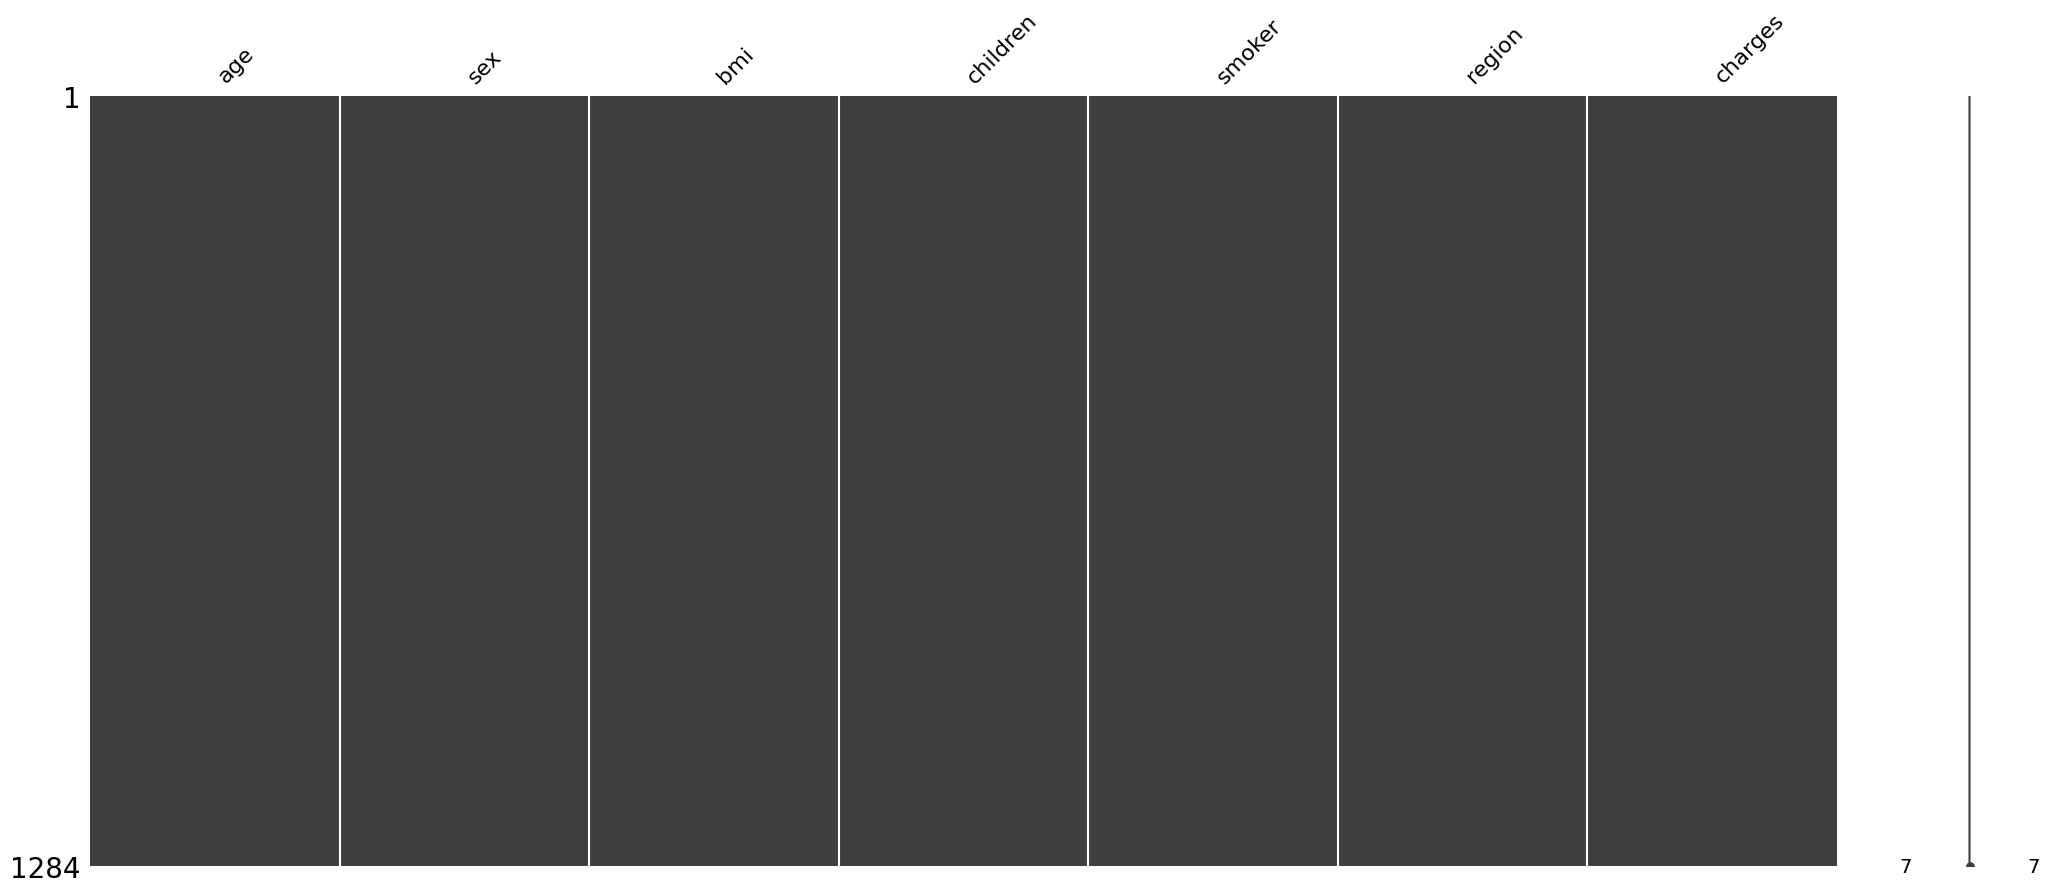

In [18]:
# children MCAR
df.children = df.children.fillna(df.children.mode()[0])

# BMI MNAR
df = df.dropna(subset='bmi', ignore_index=True)

# age MAR
df.age = df.age.fillna(df.groupby(['charges']).age.transform('median'))
df.age = df.age.fillna(df.groupby(['bmi']).age.transform('median'))
df.age = df.age.fillna(df.groupby(['children']).age.transform('median'))

msno.matrix(df)

#### * Children
I decided that the missing values in the children column was MCAR. The actual value does not have a big impact on the other features. Therefore, the mode is a good value to add in order to not have to remove the values for the other features.

#### * BMI
I decided that the missing values in the BMI column was MNAR. Due filling in with expert knowledge not being feasible, I deleted the rows with missing values.

#### * Age
I decided that the missing values in the Age column was MAR. The median values were filled in from grouping by Charges, BMI, and Children in order of the highest correlation found in the calculation in Question 1. Just using one did not add all missing values.

#  Encoding and Attribute Construction

Machine learning models usually need **numeric input**, but real-world datasets often contain **categorical data** (like colors, countries, or product types).  
To use this data in models, we apply **encoding techniques** that convert categories into numbers.  
We can also create **new features** from existing ones — this is called **attribute construction** (or feature engineering).  

---

### **Types of Encoding**

1. **Label Encoding**
- Converts categories into numbers (integers).  
- Best for **ordinal data** (where order matters, like Small < Medium < Large).  
-  Not good for nominal data because numbers may wrongly imply ranking.  

2. **One-Hot Encoding**
- Creates a separate binary column for each category.  
- Best for **nominal data** (where order does not matter, like Red, Blue, Green).  
-  Can increase dataset size if there are many categories.  

3. **Attribute Construction (Feature Engineering)**
- Creates new features (categorical or numerical) from existing ones.  
- Useful for adding more **meaningful information** to the dataset.  
- Example: From a date, we can extract **Day, Hour, Is_Weekend**.  

---

###  Summary Table

| **Method**              | **What it Does**                                  | **Example (Input)**          | **Example (Output)**                                             | **When to Use** |
|--------------------------|---------------------------------------------------|-------------------------------|------------------------------------------------------------------|-----------------|
| **Label Encoding**       | Assigns each category a number.                   | Size = {Small, Medium, Large} | Small=0, Medium=1, Large=2                                       | For **ordinal** data (ordered categories). |
| **One-Hot Encoding**     | Creates a binary column for each category.        | Color = {Red, Green, Blue}    | Red → [1,0,0], Green → [0,1,0], Blue → [0,0,1]                  | For **nominal** data (unordered categories). |
| **Attribute Construction** | Creates new categorical or numerical features from existing ones. | Date = `2023-09-13 14:35:00` | New Features → `Day = Wednesday`, `Hour = 14`, `Is_Weekend = No` | When we want to extract **useful patterns** from existing attributes. |

---

 In short:  
- **Label Encoding** = numbers for ordered categories.  
- **One-Hot Encoding** = binary columns for unordered categories.  
- **Attribute Construction** = build new features from existing ones.  


# **Question 4: Choosing the Right Encoding for Categorical Features**

In this exercise, you will decide which encoding method is most suitable for each categorical variable in the dataset, then apply it using scikit-learn.  

---

### **Your Task**

1. Inspect the dataset and identify the categorical features.  
   - Example: `sex`, `smoker`, `region`  

2. For each categorical feature:  
   - Suggest which type of encoding is **most appropriate** (Label Encoding, One-Hot Encoding, etc.).  
   - Explain why you chose that method.  

3. Apply the encoding using different classes from **`sklearn.preprocessing`**, such as:  
   - `LabelEncoder`  
   - `OneHotEncoder`  
   - `OrdinalEncoder`  

4. Compare your encoded dataset with the original:  
   - Which features are binary categorical?  
   - Which features are nominal categorical?  
   - Which features (if any) could be considered ordinal?  

5. In a **text cell**, write your explanation in 2–3 sentences for each feature:  
   - Why you chose that encoding method.  
   - Why another method might not be appropriate.  


### Scikit-learn

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, drop='if_binary')

df_encoded_sex = pd.DataFrame(ohe.fit_transform(df[['sex']]))
df_encoded_sex.columns = ohe.get_feature_names_out()
df_encoded_smoker = pd.DataFrame(ohe.fit_transform(df[['smoker']]))
df_encoded_smoker.columns = ohe.get_feature_names_out()
df_encoded_region = pd.DataFrame(ohe.fit_transform(df[['region']]))
df_encoded_region.columns = ohe.get_feature_names_out()

df = df.drop(['sex', 'smoker', 'region'] ,axis=1)

df = pd.concat([df, df_encoded_sex, df_encoded_smoker, df_encoded_region], axis=1)

df

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,0.0,1.0,0.0,0.0,0.0,1.0
1,22.0,33.770,1.0,1725.55230,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,4449.46200,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,21984.47061,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,3866.85520,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1279,50.0,30.970,3.0,10600.54830,1.0,0.0,0.0,1.0,0.0,0.0
1280,18.0,31.920,0.0,2205.98080,0.0,0.0,1.0,0.0,0.0,0.0
1281,49.0,36.850,0.0,1629.83350,0.0,0.0,0.0,0.0,1.0,0.0
1282,21.0,25.800,0.0,2007.94500,0.0,0.0,0.0,0.0,0.0,1.0


**Answers**

The Sex feature is symmetric binary categorical as it can only be female or male. It is not ordial as there is not any ranking between them. Therefore one-hot encoding is appropriate.

The Smoker feature is astymmetric binary categorical as it can only be yes or no. It is not ordial as there is not any ranking between them even though yes might be considered more important. Therefore one-hot encoding is appropriate.

The Region feature is nominal categorical as it can southeast, southwest, northeast, and northwest. It is not ordial as there is not any ranking between them. Therefore one-hot encoding is appropriate.

LabelEncoder and OrdinalEncoder both ordial encoders. For binary categorical, it can be used as the result would be the same.

Attribute construction is not needed on these features.

# 🔸 Normalization vs Standardization

When working with datasets, features (columns) often have different scales.  
For example:  
- **Age** might range from 18 to 80  
- **Income** might range from 10,000 to 200,000  

Some machine learning models (like KNN, SVM, Neural Networks) are sensitive to these differences in scale.  
To fix this, we use **feature scaling** methods like **Normalization** and **Standardization**.  

---

##  Normalization (Min-Max Scaling)

- Rescales values to a fixed range, usually **[0, 1]**.  
- Formula:  

\[
x' = \frac{x - x_{min}}{x_{max} - x_{min}}
\]

- Example: If Age ranges from 18–80, then:  
  - 18 → 0.0  
  - 80 → 1.0  
  - 49 → ~0.5  

✔ Useful when features have very different ranges and we want everything between 0 and 1.  

---

##  Standardization (Z-Score Scaling)

- Rescales values so they have **mean = 0** and **standard deviation = 1**.  
- Formula:  

\[
x' = \frac{x - \mu}{\sigma}
\]

(where μ = mean, σ = standard deviation)  

- Example: If Age has mean = 40 and std = 10, then:  
  - Age 50 → (50-40)/10 = 1.0  
  - Age 30 → (30-40)/10 = -1.0  

✔ Useful for algorithms that assume data is normally distributed (e.g., Logistic Regression, SVM, PCA).  


# Question 5

1. Apply **Normalization** to your dataset using either a custom function or `MinMaxScaler` from `sklearn.preprocessing`.  
2. Apply **Standardization** to the same dataset using either a custom function or `StandardScaler`.  
3. Compare the results:  
   - Which features are now between 0 and 1?  
   - Which features now have mean ~0 and std ~1?  
4. In a **text cell**, explain in 2–3 sentences:  
   - When would you use **Normalization**?  
   - When would you use **Standardization**?  


In [20]:
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

df.bmi = standard_scaler.fit_transform(df[['bmi']])
df[['age', 'children', 'charges']] = min_max_scaler.fit_transform(df[['age', 'children', 'charges']])

df

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,-0.450527,0.0,0.251611,0.0,1.0,0.0,0.0,0.0,1.0
1,0.086957,0.518327,0.2,0.009636,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.391237,0.6,0.053115,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,-1.307971,0.0,0.333010,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,-0.288776,0.0,0.043816,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1279,0.695652,0.056182,0.6,0.151299,1.0,0.0,0.0,1.0,0.0,0.0
1280,0.000000,0.212981,0.0,0.017305,0.0,0.0,1.0,0.0,0.0,0.0
1281,0.673913,1.026686,0.0,0.008108,0.0,0.0,0.0,0.0,1.0,0.0
1282,0.065217,-0.797136,0.0,0.014144,0.0,0.0,0.0,0.0,0.0,1.0


**Answers**

The BMI feature is a normal distribution. Therefore, standarization with StandardScaler is appropriate.

The Age, Children, and Charges features are not, so normalization with MinMaxScaler is appropriate.
